In [36]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
flow_data =  pd.read_csv('BathUGS_hrlyflows_070396to301019.csv',',')
flow_data['period']= flow_data["Date"].map(str) + flow_data["Time"].map(str)
flow_data["Date"]= pd.to_datetime(flow_data.Date)

print(flow_data['period'])

old_sensor_df = pd.read_csv('WQ_watershed -2018 copy.csv', delimiter=',')
old_sensor_df['period']= old_sensor_df["Date"].map(str) + old_sensor_df["Time"].map(str)
#old_sensor_df["Date"]= pd.to_datetime(old_sensor_df.Date)

print(old_sensor_df['period'])


flow_sensordf = pd.merge(old_sensor_df, flow_data, on = 'period')
print(flow_sensordf)

0             2018-05-29nan
1             2018-05-29nan
2             2018-05-29nan
3             2018-05-29nan
4             2018-05-29nan
5        2018-05-2916:00:00
6        2018-05-2917:00:00
7        2018-05-2918:00:00
8        2018-05-3019:00:00
9        2018-05-3020:00:00
10       2018-05-3021:00:00
11       2018-05-3022:00:00
12       2018-05-3023:00:00
13        2018-05-300:00:00
14        2018-05-301:00:00
15        2018-05-302:00:00
16        2018-05-303:00:00
17        2018-05-304:00:00
18        2018-05-305:00:00
19        2018-05-306:00:00
20        2018-05-307:00:00
21        2018-05-308:00:00
22        2018-05-309:00:00
23       2018-05-3010:00:00
24       2018-05-3011:00:00
25       2018-05-3012:00:00
26       2018-05-3013:00:00
27       2018-05-3014:00:00
28       2018-05-3015:00:00
29       2018-05-3016:00:00
                ...        
12422     2019-10-291:00:00
12423     2019-10-292:00:00
12424     2019-10-293:00:00
12425     2019-10-294:00:00
12426     2019-10-29

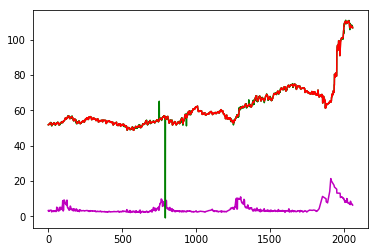

In [59]:

def outlierReduction(dirty_data, thresh):
    outliers = []
    outliers = dirty_data.rolling(window=3, center=True).median()
    difference = np.abs(dirty_data - outliers)
    outlier_idx = []
    for i in range(len(dirty_data)):    
        difference = np.abs(dirty_data[i] - outliers[i])
        if difference > threshold:
            outlier_idx.append(i)

    return dirty_data.drop(outlier_idx)
    

threshold = 0.1    
clean_conductivity_data = outlierReduction(flow_sensordf['Cond µS/cm'],threshold)
clean_flow_data = outlierReduction(flow_sensordf['value'], threshold)
clean_turbidity = outlierReduction(flow_sensordf['Turbidity FNU'], threshold)
clean_fDom = outlierReduction(flow_sensordf['fDOM QSU'],threshold)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(clean_conductivity_data/100, 'r')
ax.plot(clean_flow_data, 'm')
ax.plot(flow_sensordf['fDOM QSU'], 'g')
ax.plot(clean_fDom, 'r')



#fig.savefig('outlierfunc.png')




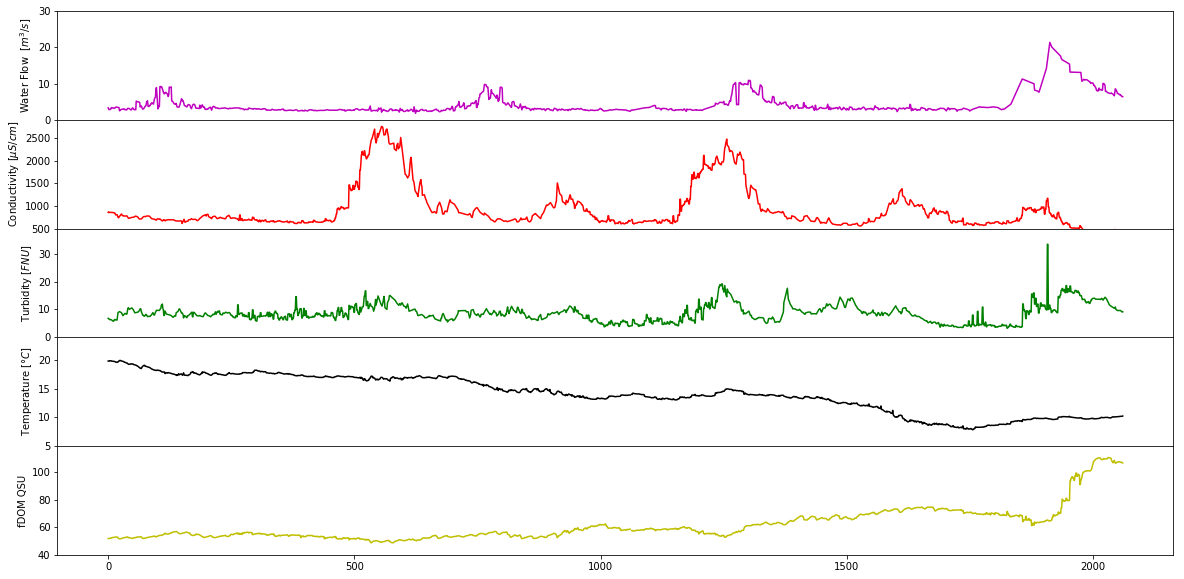

In [74]:
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(15,10))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)


# Plot each graph, and manually set the y tick values
axs[0].plot(clean_flow_data, 'm')
axs[0].set_ylabel('Water Flow  $[m^{3}/s]$')
#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(0, 30)

axs[1].plot(clean_conductivity_data, 'r')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylabel('Conductivity $[µS/cm]$')
axs[1].set_ylim(500, 2900)

axs[2].plot(clean_turbidity, 'g')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[2].set_ylabel('Turbidity $[FNU]$')
axs[2].set_ylim(0, 39)

axs[3].plot(flow_sensordf['Temp °C'], 'k')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[3].set_ylabel('Temperature $[°C]$')
axs[3].set_ylim(5, 24)

axs[4].plot(clean_fDom, 'y')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[4].set_ylabel('fDOM QSU')
axs[4].set_ylim(40, 119)

plt.grid
plt.show
fig.savefig('sensor_vs_flow.png')

In [77]:


flow_sensordf.corr(method = 'pearson')

,Time (Fract. Sec),NH3 mg/L,Cond µS/cm,Depth m,fDOM QSU,NH4+ -N mV,fDOM RFU,NO3 -N mV,NO3 -N mg/L,nLF Cond µS/cm,...,SpCond µS/cm,TDS mg/L,Turbidity FNU,TSS mg/L,Wiper Position volt,Temp °C,Vertical Position m,Battery V,Cable Pwr V,value
Time (Fract. Sec),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3 mg/L,NaN,1.000000,0.640624,0.016275,-0.181968,0.505294,-0.181949,0.111994,-0.092414,0.608958,...,0.610360,0.610354,0.219596,NaN,-0.036478,0.160361,0.019025,0.053683,0.111017,-0.095522
Cond µS/cm,NaN,0.640624,1.000000,0.059515,-0.363160,0.933222,-0.363168,0.110039,-0.095741,0.989274,...,0.989872,0.989869,0.319483,NaN,-0.010393,0.206046,0.061557,0.154907,0.034811,-0.095310
Depth m,NaN,0.016275,0.059515,1.000000,0.129304,0.038987,0.129325,-0.099777,0.095837,0.074061,...,0.073529,0.073511,0.068502,NaN,0.014974,-0.097193,0.997303,-0.076599,-0.087132,0.038672
fDOM QSU,NaN,-0.181968,-0.363160,0.129304,1.000000,-0.465526,1.000000,-0.753769,0.803293,-0.277984,...,-0.280413,-0.280377,0.169971,NaN,-0.025769,-0.731247,0.128569,-0.589830,-0.284776,0.407234
NH4+ -N mV,NaN,0.505294,0.933222,0.038987,-0.465526,1.000000,-0.465534,0.072663,-0.089487,0.935659,...,0.935725,0.935717,0.194488,NaN,-0.007913,0.159524,0.040827,0.164527,0.058029,-0.174064
fDOM RFU,NaN,-0.181949,-0.363168,0.129325,1.000000,-0.465534,1.000000,-0.753774,0.803298,-0.277991,...,-0.280420,-0.280384,0.169955,NaN,-0.025795,-0.731258,0.128589,-0.589813,-0.284789,0.407221
NO3 -N mV,NaN,0.111994,0.110039,-0.099777,-0.753769,0.072663,-0.753774,1.000000,-0.985421,-0.012218,...,-0.008521,-0.008550,-0.065769,NaN,0.026331,0.926786,-0.100296,0.651361,0.347349,-0.335198
NO3 -N mg/L,NaN,-0.092414,-0.095741,0.095837,0.803293,-0.089487,0.803298,-0.985421,1.000000,0.030206,...,0.026577,0.026607,0.079837,NaN,-0.033470,-0.946684,0.096195,-0.680444,-0.360620,0.370092
nLF Cond µS/cm,NaN,0.608958,0.989274,0.074061,-0.277984,0.935659,-0.277991,-0.012218,0.030206,1.000000,...,0.999990,0.999990,0.314717,NaN,-0.016062,0.069220,0.076077,0.074345,-0.016219,-0.051655
